# Title

In [1]:
!pip list | grep "fastai"

fastai                        2.7.9


In [2]:
from fastai.vision.all import *

In [3]:
# download and untar PASCAL 2007 dataset
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#9) [Path('/home/stormbird/.fastai/data/pascal_2007/train'),Path('/home/stormbird/.fastai/data/pascal_2007/train.json'),Path('/home/stormbird/.fastai/data/pascal_2007/models'),Path('/home/stormbird/.fastai/data/pascal_2007/test'),Path('/home/stormbird/.fastai/data/pascal_2007/train.csv'),Path('/home/stormbird/.fastai/data/pascal_2007/test.json'),Path('/home/stormbird/.fastai/data/pascal_2007/valid.json'),Path('/home/stormbird/.fastai/data/pascal_2007/segmentation'),Path('/home/stormbird/.fastai/data/pascal_2007/test.csv')]

In [4]:
!ls

Makefile			 README.md	   setup-conda.sh
multilabel-classification.ipynb  requirements.txt  todo.md


In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [6]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

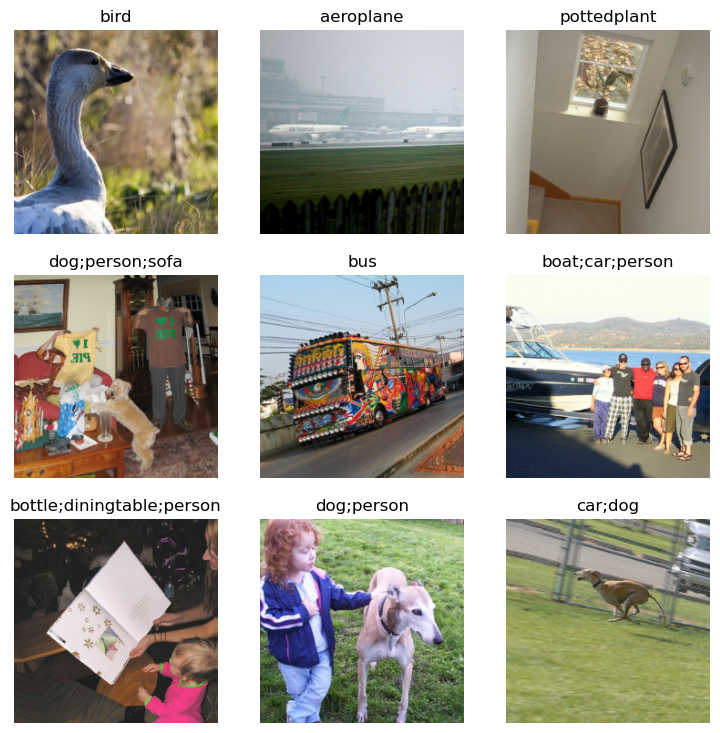

In [7]:
dls.show_batch()

In [8]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

/home/stormbird/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/stormbird/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

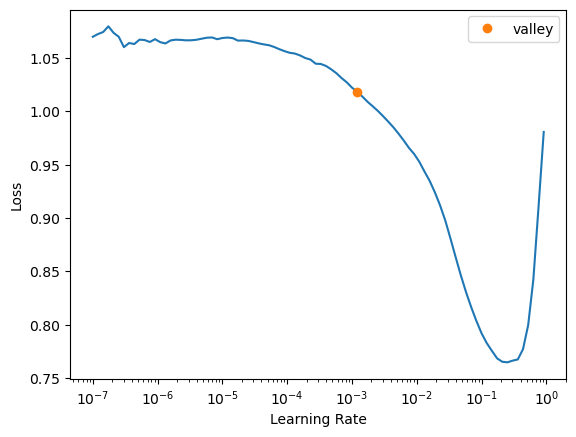

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.435220,0.127536,0.959163,0.714773,0.759740,01:23


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.186759,1.564745,0.922868,0.186575,0.240433,01:38
1,0.168612,0.136816,0.954920,0.536252,0.582560,01:38


/home/stormbird/mambaforge/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


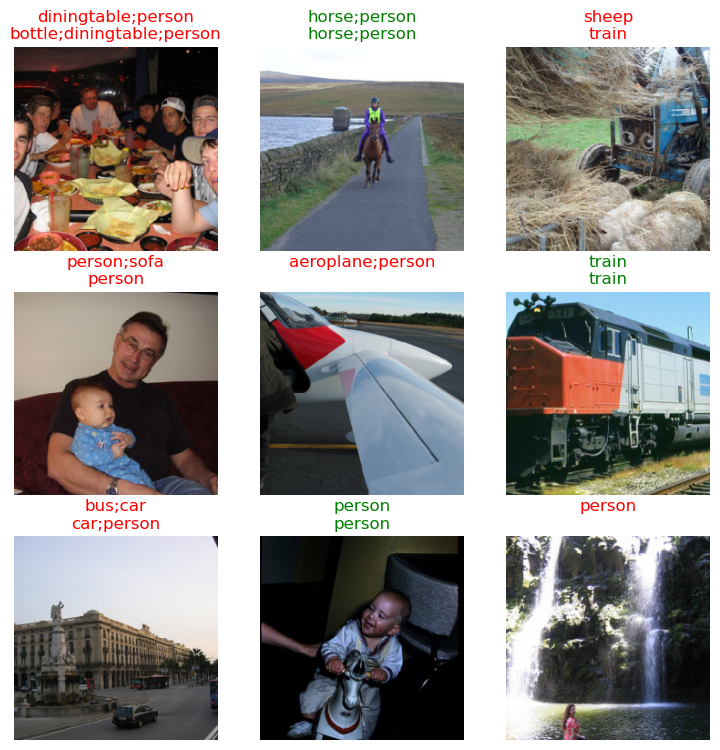

In [11]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [ ]:
torch.cuda.is_available()

Trained on a GPU 

In [17]:
learn.export("model.pkl")

In [18]:
!ls

app1.ipynb  multilabel-classification.ipynb  requirements.txt  todo.md
Makefile    README.md			     setup-conda.sh
